In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
file_path = "API_SP.POP.TOTL_DS2_en_csv_v2_85220.csv"

In [21]:
# Detect the header row dynamically
with open(file_path, 'r') as f:
    lines = f.readlines()

for idx, line in enumerate(lines):
    if "Country Name" in line:
        header_row = idx
        break

In [22]:
df_main = pd.read_csv(file_path, skiprows=header_row)

# Filter relevant columns for 2023 population data
df_2023 = df_main[['Country Name', '2023']].dropna()

In [23]:
# Convert population data to numeric
df_2023['2023'] = pd.to_numeric(df_2023['2023'], errors='coerce')

# Sort to get top 10 most populous countries
top10_populous = df_2023.sort_values(by='2023', ascending=False).head(10)

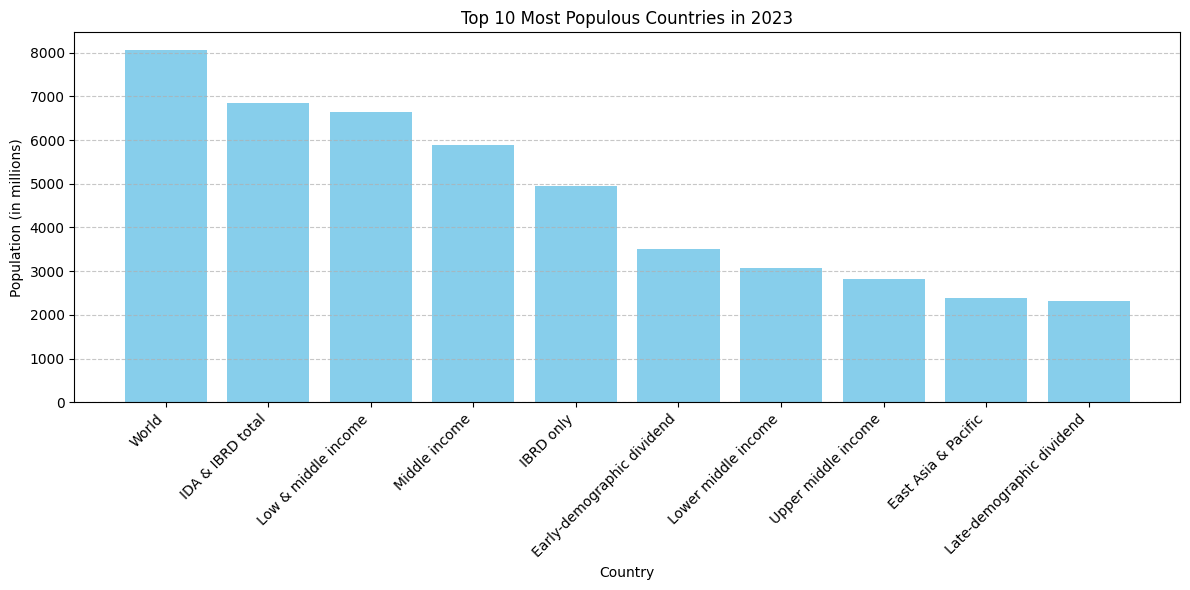

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(top10_populous['Country Name'], top10_populous['2023'] / 1e6, color='skyblue')
plt.title('Top 10 Most Populous Countries in 2023')
plt.xlabel('Country')
plt.ylabel('Population (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
